# Prueba Técnica
# Científico de datos


## Julieth Carolina Alvarado Ramírez
### 20/07/22

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

#### 1. Leer el archivo 

#### 2.	Mostrar las columnas

In [3]:
df = pd.read_csv("Cruceros (1).csv")
df

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


#### 3.	Calcular estadísticas básicas de los datos, interpretarlos y enunciar sus observaciones

Se puede observar que, en general, las variables tienen un buen comportamiento estadístico que no está afectado significativamente por outliers u observaciones atípicas que afecten las medidas de desviación estándar. Esto es evidente tras analizar los valores de la media, mediana y desviación estándar de cada una de las variables, pues tanto media como mediana no varían considerablemente relativo a su desviación estándar. En los histogramas realizados posteriormente en el pairplot también se puede notar esta característica de los estadísticos de la muestra.

También se puede notar que todas las columnas están completas, no hay datos nulos ni faltantes por lo que no es necesario emplear técnicas de imputación. Adicional a eso, se observa que a pesar de que no están en escalas drásticamente diferentes, puede ser necesario reescalar los datos para obtener un mejor comportamiento del modelo de predicción.

In [4]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [5]:
df.median()

Age                  14.000
Tonnage              71.899
passengers           19.500
length                8.555
cabins                9.570
passenger_density    39.085
crew                  8.150
dtype: float64

In [6]:
df.isnull().values.any()

False

#### 4.	Seleccionar las columnas que se consideran importantes para predecir el tamaño de la tripulación (crew)
#### 5.	Si eliminas columnas explica la razón de la decisión tomada

Para seleccionar las columnas con las cuales predecir el tamaño de la tripulación se realizó inicialmente un paitplot para visualizar la linealidad entre las diferentes características con la variable 'crew'. De esta se observó que las variables que más se correlacionan con el tamaño de la tripulación son: 'Tonnage', 'passengers', 'length' y 'cabins'. Adicionalmente, tras varias pruebas del comportamiento del modelo, se incluyó también la característica 'Cruise_line' para la predicción.

La escogencia de columnas a usar en la predicción también es evidente del heatmap de correlación entre variables.

De aquí se crean las variables X e y para emplear en el modelo de regresión para la predicción. En este caso no se eliminó ninguna columna del dataframe original, sin embargo no se tuvieron en cuenta las variables 'Age', 'passenger_density' ni las 2 categóricas.

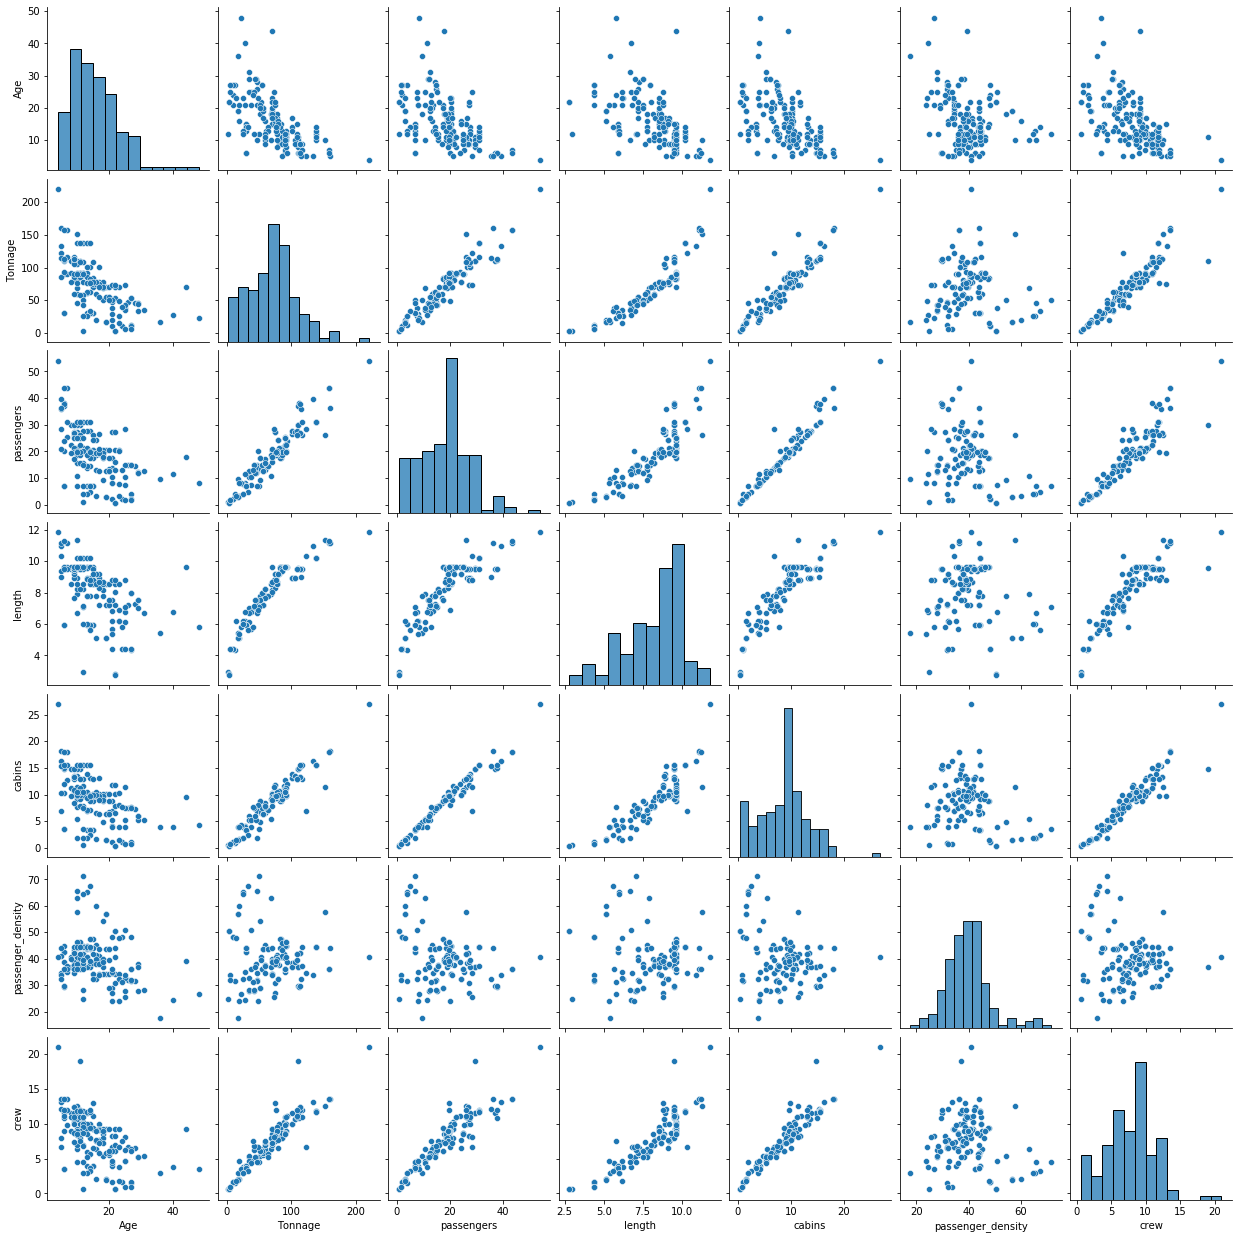

In [7]:
sns.pairplot(df);

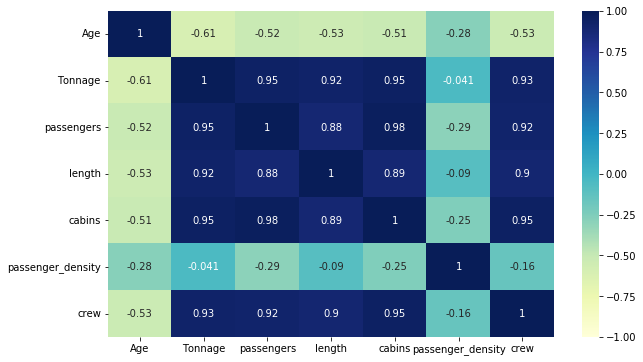

In [8]:
correlation = df.corr()

# Grafica de correlación heatmap
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

In [9]:
# Definición de las variables para usar en modelo de regresión 

X = df[['Tonnage', 'passengers', 'length', 'cabins', 'Cruise_line']]
X = pd.get_dummies(X)
y = df['crew']

In [10]:
X.head()

,Tonnage,passengers,length,cabins,Cruise_line_Azamara,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,Cruise_line_Crystal,Cruise_line_Cunard,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,30.277,6.94,5.94,3.55,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.277,6.94,5.94,3.55,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47.262,14.86,7.22,7.43,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110.000,29.74,9.53,14.88,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,101.353,26.42,8.92,13.21,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 6.	Utiliza “one-hot encoding” para las características categóricas

En este caso hay dos columnas en el dataset que se consideran categóricas: Ship_name y Cruise_line.

Empleamos la función get_dummies de Pandas para agregar las columnas correspondientes a cada una de las categorías de estas variables. En total resulta un dataset con 165 columnas.

In [11]:
df['Ship_name'].unique().shape

(138,)

In [12]:
df['Cruise_line'].unique().shape

(20,)

In [13]:
df_ohe = pd.get_dummies(df, columns=['Ship_name', 'Cruise_line'])
df_ohe.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 7.	Crea conjuntos de entrenamiento y prueba (utilice el 60 % de los datos para el entrenamiento y el restante para prueba).

Aquí tomamos una realización dividiendo aleatoriamente el conjunto de datos en 60% para entrenamiento y 40% para testeo. En este punto también es necesario realizar la normalización de los datos para establecer todas las características en una misma escala. Para esto se empleó la normalización estándar. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print("Tamaño muestra entrenamiento = ", X_train.shape[0])
print("Tamaño muestra testeo = ", X_test.shape[0])

Tamaño muestra entrenamiento =  94
Tamaño muestra testeo =  64


In [15]:
# Normalización de variables
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#### 8.	Cree un modelo de aprendizaje automático para predecir el tamaño de la tripulación. 

In [16]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train);

In [17]:
print("Coeficientes del modelo de regresión:\n", linear_model.coef_)

Coeficientes del modelo de regresión:
 [ 0.19937267 -1.34215748  0.9812801   4.17182554  0.01733471  0.13049258
  0.16210824 -0.10888828  0.02033873 -0.05332587  0.07683206 -0.14570373
 -0.07317249  0.02516263  0.09642591  0.          0.01558562  0.02568451
  0.07851991 -0.38820982  0.08527499  0.07199032  0.30349449 -0.02705033]


In [18]:
print("Intercepto del modelo de regresión:\n", linear_model.intercept_)

Intercepto del modelo de regresión:
 7.670957446808512


Evaluación del modelo mediante la métrica R2. Aquí se realizaron algunas pruebas y se determinó que el rendimiento del modelo aumentaba tomando además de las 4 variables analizadas en la correlación, la variable categórica de Cruise_line

In [20]:
print("R2 score test = ", linear_model.score(X_test, y_test))

R2 score test =  0.9574547549223472


In [21]:
print("R2 score train = ", linear_model.score(X_train, y_train))

R2 score train =  0.939315450850492


#### 9.	Calcula el coeficiente de correlación de Pearson para el conjunto de entrenamiento y los conjuntos de datos de prueba.

In [ ]:
corr, _ = pearsonr(np.squeeze(X_train), np.squeeze(y_train))

#### 10.	Describa los hiperparámetros en su modelo y cómo los cambiaría para mejorar el rendimiento del modelo.

En el caso del modelo que se empleó en este caso, una regresión lineal simple, no hay hiperparámetros que se puedan establecer a mano precisamente para mejorar el rendimiento numérico del modelo, así como en el caso de gradient descent un hiperparámetro es la tasa de aprendizaje o como en el caso de KNN el número de vecinos. 

Sin embargo, esto no quiere decir que no haya parámetros que se puedan modificar para mejorar el rendimiento del modelo. Por ejemplo, al tomar diferentes realizaciones de las muestras de entrenamiento y testeo se puede reducir el sesgo que introduce la escogencia de un sólo conjunto de datos; también influye la normalización y la cantidad o escogencia de características empleadas para la predicción. Los anteriores no son precisamente hiperparámetros porque no siempre se pueden previo al conjunto de datos, es decir, dependen de la escogencia del data set.

####  11.	¿Qué es la regularización? ¿Cuál es el parámetro de regularización en su modelo?

La regularización es un método que permite mejorar el rendimiento de un modelo de machine learning, en este caso una regresión lineal múltiple. Este busca que los coeficientes que se calculan con el modelo se acerquen a cero, buscando reducir la correlación que puede existir entre las variables usadas como predictoras y ayudando a minimizar el overfitting.

En este caso donde se ha usado un modelo de regresión lineal múltiple, la forma más adecuada de introducir la regularización es mediante el método de Lasso que permite seleccionar las variables y mejorar la exactitud con que el modelo predice. 

#### 12.	Trazar el valor del parámetro de regularización frente a la correlación de Pearson para los conjuntos de prueba y entrenamiento, y ver si su modelo tiene un problema de sesgo o de varianza